# Average element pattern (AEPs)

Currently, this package contains AEPs for SKA-Low stations only. The AEPs are stored as spherical harmonic coefficients with an `lmax=51` in a file `postx/data/aeps/ska_low.h5`. The file contains the linear real-valued AEP components `(XX*, Re(XY*), Im(XY*), YY*)`. This 12 MB file was generated from `HARP_SKALA41_randvogel_avg` npz files (1.26 GB).  

While a Mueller matrix contains 16 terms (M = Jp ⊗ Jq^H), only 4 are required to model the response to an unpolarised sky as we assume `Jp = Jq`, and the unpolarised Mueller vectoris `S = (1, 0, 0, 1)`.

In [1]:
import healpy as hp
import numpy as np
import pylab as plt
import pyshtools as pysh
from astropy.units import Quantity

from ska_ost_low_uv.postx import ApertureArray
from ska_ost_low_uv.postx.aeps import (
    load_aep,
    load_aep_coeffs,
    load_aep_orth,
    orthview_aep,
)

## View AEPs

/Users/daniel.price/Data/ska-ost-low-uv/src/ska_ost_low_uv/postx/aeps/aep_viewers.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


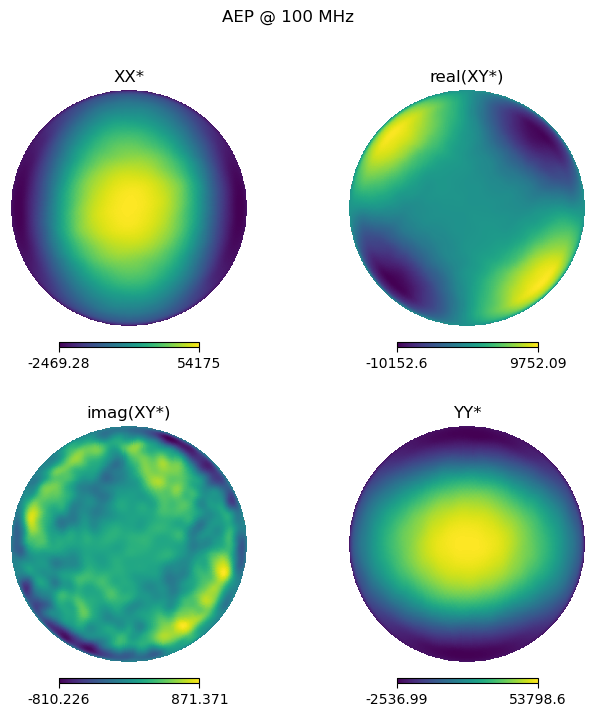

In [2]:
orthview_aep(100, mode='linear')

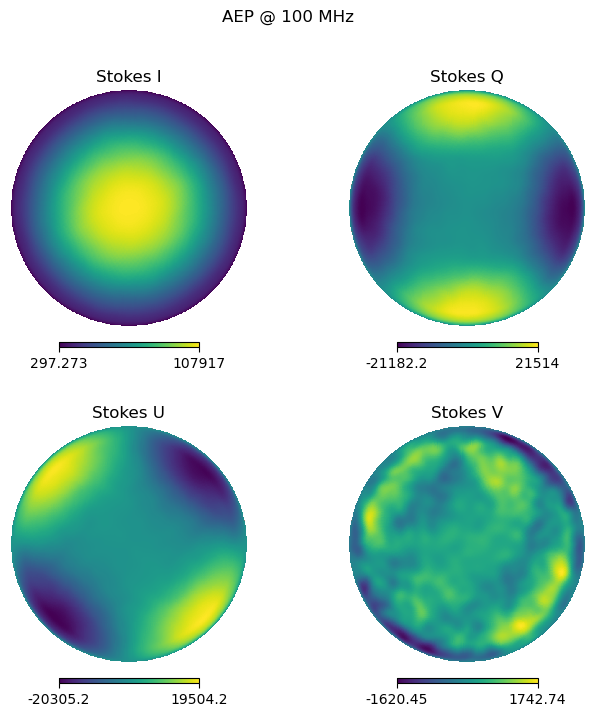

In [3]:
orthview_aep(100, mode='stokes')

## Load AEP coefficients

dict_keys(['xx', 'yy', 're_xy', 'im_xy', 'lmax', 'f0'])


/Users/daniel.price/local/mamba/envs/low-uv/lib/python3.11/site-packages/pyshtools/shclasses/shcoeffs.py:3357: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 640x576 with 2 Axes>,
 <Axes: xlabel='Spherical harmonic order', ylabel='Spherical harmonic degree'>)

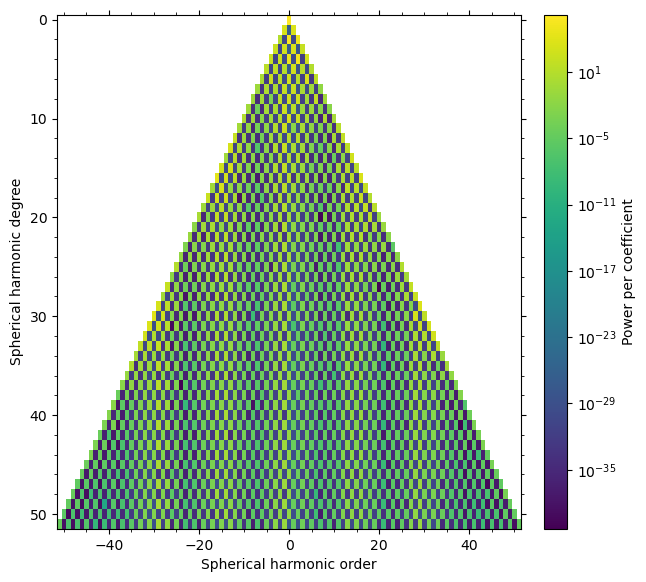

In [4]:
aep_coeffs = load_aep_coeffs(50)
print(aep_coeffs.keys())

# Coeffs can be loaded into healpy as such:
aep = hp.sphtfunc.alm2map(aep_coeffs['xx'], nside=128, lmax=51)

# Pyshtools is loaded
lmax = 51
l, m = hp.Alm().getlm(lmax)

d = np.zeros((2, lmax + 1, lmax + 1), dtype='float32')
d[0, l, m] = aep_coeffs['xx'].real
d[1, l, m] = aep_coeffs['xx'].imag

clm = pysh.SHCoeffs.from_array(d, normalization='ortho')
clm.plot_spectrum2d()

## Load AEP to healpix

In [5]:
aep_hpx = load_aep(100, fill_value=np.nan)

We can move the AEP to centre on the sky

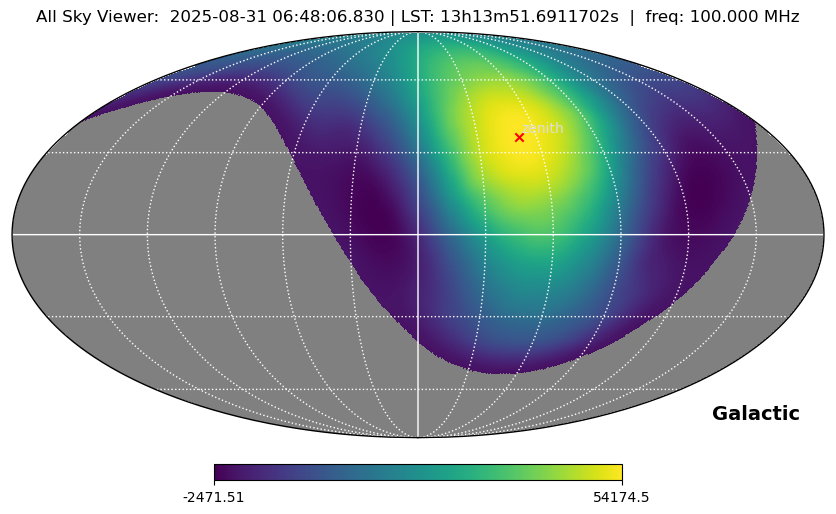

In [6]:
obs_freq = Quantity([100], unit='MHz')
aa = ApertureArray(station_id='s8-6', sim_f=obs_freq)
zenith = aa.coords.get_zenith()

aep_hpx = load_aep(obs_freq[0].value, fill_value=np.nan, sky_coord=zenith)

srcs = {'zenith': zenith}
aa.viewer.skycat = srcs
aa.viewer.mollview(aep_hpx, overlay_srcs=True, pol_idx=0)

## Rotate AEPS

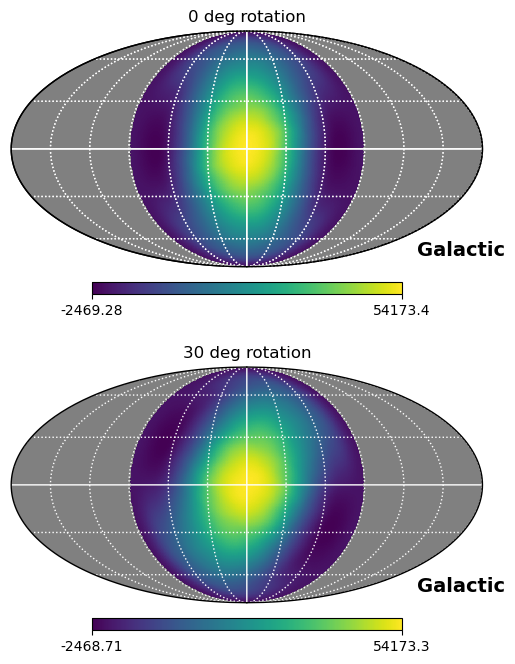

In [7]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
aep_hpx = load_aep(100, fill_value=np.nan)
aa.viewer.mollview(aep_hpx, pol_idx=0, hold=True, title='0 deg rotation')
plt.subplot(2, 1, 2)
aep_hpx = load_aep(100, fill_value=np.nan, rot_angle=30)
aa.viewer.mollview(aep_hpx, pol_idx=0, hold=True, title='30 deg rotation')

### Load orthographic 2D version

In [8]:
aep_img = load_aep_orth(150, npix=257, fill_value=np.nan)
aep_img_stokes = load_aep_orth(150, mode='stokes', npix=257, fill_value=np.nan)
print(aep_img.shape)

STOKED
(257, 257, 4)


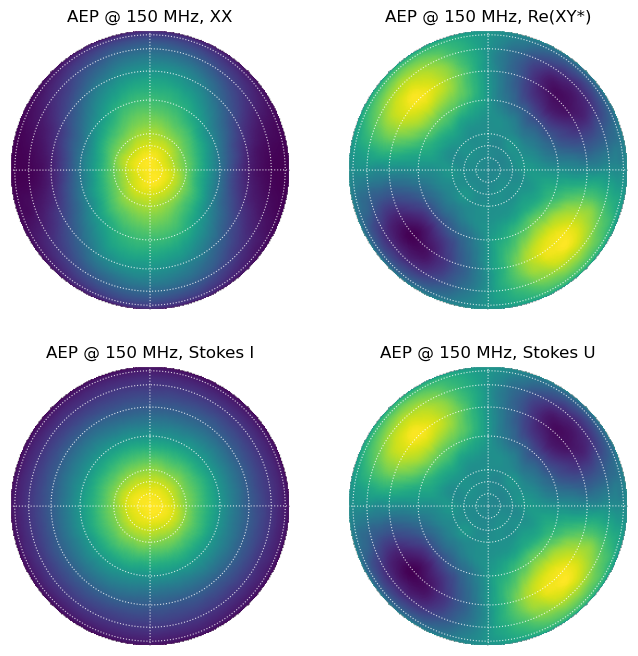

In [9]:
# Plot using orthview() in ApertureArray class
aa = ApertureArray(station_id='s8-6')

plt.figure(figsize=(8, 8))
aa.viewer.orthview(
    aep_img, overlay_coords='altaz', title='AEP @ 150 MHz, XX', subplot_id=(2, 2, 1), reuse_fig=True
)
aa.viewer.orthview(
    aep_img,
    overlay_coords='altaz',
    title='AEP @ 150 MHz, Re(XY*)',
    pol_idx=1,
    subplot_id=(2, 2, 2),
    reuse_fig=True,
)

aa.viewer.orthview(
    aep_img_stokes,
    overlay_coords='altaz',
    title='AEP @ 150 MHz, Stokes I',
    subplot_id=(2, 2, 3),
    reuse_fig=True,
)
aa.viewer.orthview(
    aep_img_stokes,
    overlay_coords='altaz',
    title='AEP @ 150 MHz, Stokes U',
    pol_idx=2,
    subplot_id=(2, 2, 4),
    reuse_fig=True,
)